In [2]:
!pip install scipy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [3]:
import pandas as pd
import time

In [4]:
df = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Github_Repos/Twitter-Sentiment-Analysis/data/sampled/training.1600000.processed.noemoticon.csv", encoding = "latin-1", low_memory=False)

In [5]:
df.head()

,ids,date,user,text,target
0,2265878782,Sun Jun 21 07:29:15 PDT 2009,MeeJong,This morning my daughter asked me if I hate my...,0
1,2205565064,Wed Jun 17 05:00:35 PDT 2009,kathysyahrizal,"I forgot to charge my bb, zzzzz only 35% left",0
2,2002872654,Tue Jun 02 05:22:07 PDT 2009,kgautam,my MBP battery is fluctuating between dead to ...,0
3,1835496893,Mon May 18 06:07:33 PDT 2009,thejanice,i really wish my landlord would call me back. ...,0
4,1573596472,Tue Apr 21 01:55:46 PDT 2009,lucyxechelon,mean blog people,0


In [6]:
df.shape

(50000, 5)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [9]:
# tfidf
tfidf = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)
train_x_tfidf = tfidf.fit_transform(X_train)
test_x_tfidf = tfidf.transform(X_test)

In [10]:
# logistic regression
from sklearn.linear_model import LogisticRegression
def logistic_regression(train_x, train_y):
  classifier = LogisticRegression(max_iter=100000)
  classifier.fit(train_x, train_y)
  return classifier

# svm
from sklearn.svm import SVC
def svm(train_x, train_y):
    classifier = SVC(max_iter=100000, C=1.0)
    classifier.fit(train_x, train_y)
    return classifier

# knn
from sklearn.neighbors import KNeighborsClassifier
def knn(train_x, train_y):
  classifier = KNeighborsClassifier()
  classifier.fit(train_x, train_y)
  return classifier

# decision tree
from sklearn import tree
def decision_tree(train_x, train_y):
  classifier = tree.DecisionTreeClassifier()
  classifier.fit(train_x, train_y)
  return classifier

In [11]:
# run logistic regression
import time
start_time = time.time()
classifier = logistic_regression(train_x_tfidf, y_train)
log_predictions = classifier.predict(test_x_tfidf)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.3726987838745117 seconds ---


In [12]:
# evaluate logistic regression
print(accuracy_score(y_test, log_predictions))
print(classification_report(y_test, log_predictions))
print(confusion_matrix(y_test, log_predictions))

0.7783
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      5022
           4       0.77      0.79      0.78      4978

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

[[3867 1155]
 [1062 3916]]


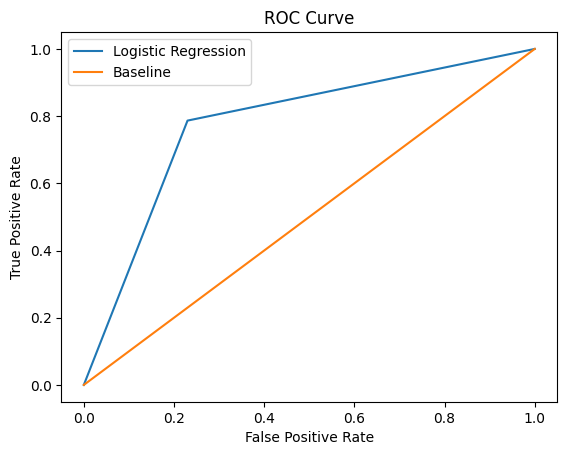

0.7783366285971297


In [13]:
# plot roc curve
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_predictions, pos_label=4)
plt.plot(log_fpr, log_tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
# print auc score
print(roc_auc_score(y_test, log_predictions))

In [14]:
# run svm
start_time = time.time()
classifier = svm(train_x_tfidf, y_train)
predictions = classifier.predict(test_x_tfidf)
print("--- %s seconds ---" % (time.time() - start_time))

--- 439.8839478492737 seconds ---


In [15]:
# evaluate svm
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7843
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      5022
           4       0.78      0.79      0.78      4978

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

[[3912 1110]
 [1047 3931]]


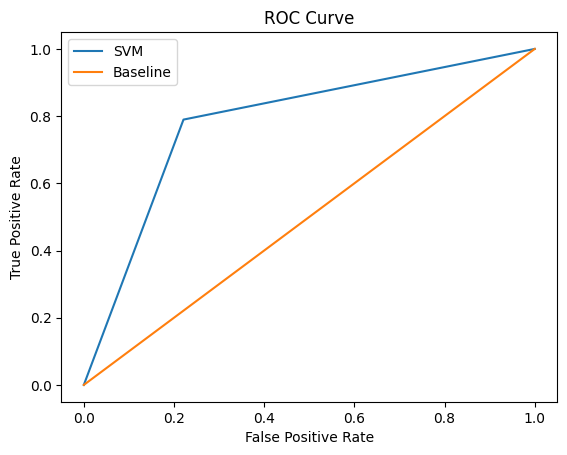

0.7843235445038215


In [16]:
# plot roc curve
svm_fpr, svm_tpr, svm_thresold = roc_curve(y_test, predictions, pos_label=4)
plt.plot(svm_fpr, svm_tpr, label="SVM")
plt.plot([0,1], [0,1], label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
# print auc score
print(roc_auc_score(y_test, predictions))

In [17]:
# run knn
start_time = time.time()
classifier = knn(train_x_tfidf, y_train)
predictions = classifier.predict(test_x_tfidf)
print("--- %s seconds ---" % (time.time() - start_time))

--- 18.787062883377075 seconds ---


In [18]:
# evaluate knn
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.57
              precision    recall  f1-score   support

           0       0.62      0.37      0.46      5022
           4       0.55      0.77      0.64      4978

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.55     10000
weighted avg       0.58      0.57      0.55     10000

[[1860 3162]
 [1138 3840]]


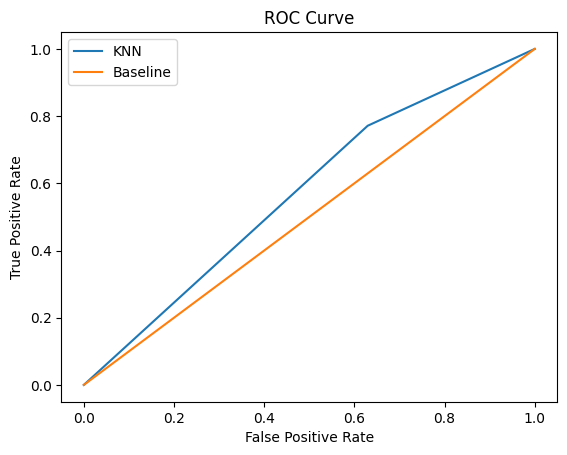

0.5708822522804041


In [19]:
# plot roc curve
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, predictions, pos_label=4)
plt.plot(knn_fpr, knn_tpr, label="KNN")
plt.plot([0,1], [0,1], label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
# print auc score
print(roc_auc_score(y_test, predictions))

In [20]:
# run decision tree
start_time = time.time()
classifier = decision_tree(train_x_tfidf, y_train)
predictions = classifier.predict(test_x_tfidf)
print("--- %s seconds ---" % (time.time() - start_time))

--- 15.729740619659424 seconds ---


In [21]:
# evaluate decision tree
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.6828
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      5022
           4       0.68      0.69      0.69      4978

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

[[3375 1647]
 [1525 3453]]


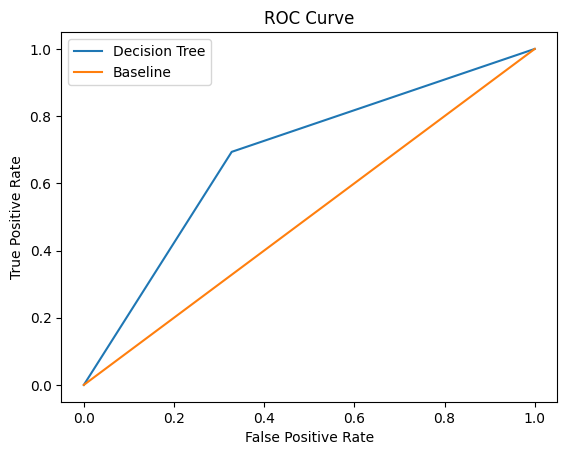

0.6828475399283731


In [22]:
# plot roc curve
dt_fpr, dt_tpr, dt_thresold = roc_curve(y_test, predictions, pos_label=4)
plt.plot(dt_fpr, dt_tpr, label="Decision Tree")
plt.plot([0,1], [0,1], label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
# print auc score
print(roc_auc_score(y_test, predictions))